In [61]:
!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [62]:
import solovay_kitaev as sk
from math import e, pi

# Basic usage

In [63]:
# Unitary matrix you want to approximate
# Rz(1/16)
target = sk.Uop.from_matrix([[1,0],[0, e**(1j*pi/32)]])

# prepare epsilon network used for basic approximation
enet = sk.generate_epsilon_network()

# execute Solovay Kitaev algorithm
result = sk.solovay_kitaev(enet, target, 5)

# print out the calculated gates
print(result.construction_str())

(I+iY)T(I-iY)(I+iY)T(I+iX)T(I+iX)T(I-iY)Z(I+iY)XTX(I-iY)Z(I+iY)XTX(I-iX)XTX(I-iX)XTX(I-iY)(I+iY)T(I+iY)T(I+iY)T(I+iY)(I+iX)T(I+iX)T(I+iX)T(I+iX)T(I+iY)T(I+iX)TZ(I-iX)XTX(I-iX)XTX(I-iX)XTX(I-iX)ZXTX(I-iX)XTX(I-iY)XTX(I+iY)T(I+iX)T(I+iY)T(I+iX)(I+iZ)(I-iY)XTX(I-iY)XTX(I-iY)XTX(I-iY)(I+iY)XXTXX(I+iX)XXTXX(I+iX)XXTXX(I-iY)Z(I+iY)XXTXX(I-iY)Z(I+iY)XTX(I-iX)XTX(I-iX)XTX(I-iY)(I+iY)XTX(I-iY)(I-iZ)(I-iX)XTX(I-iY)XTX(I-iX)XTX(I-iY)XXTXX(I+iY)XXTXX(I+iX)XXTXXZ(I+iX)XXTXX(I+iX)XXTXX(I+iX)XXTXX(I+iX)ZXTX(I-iX)XTX(I-iY)XTX(I-iX)XTX(I-iX)XTX(I-iX)XTX(I-iX)(I+iY)T(I-iY)(I+iY)T(I+iX)T(I+iX)T(I-iY)Z(I+iY)XTX(I-iY)Z(I+iY)XTX(I-iX)XTX(I-iX)XTX(I-iY)(I+iY)T(I+iY)T(I+iY)T(I+iY)(I+iX)T(I+iX)T(I+iY)T(I+iY)(I-iZ)(I+iY)T(I+iY)T(I+iX)T(I+iY)Z(I+iZ)(I-iY)XTX(I-iY)XTX(I-iX)XTX(I-iX)Z(I-iY)XTX(I-iX)XTX(I-iY)XTX(I-iY)T(I+iY)T(I+iY)TXZ(I+iX)T(I+iX)T(I+iX)T(I+iX)ZXXTX(I-iY)XTX(I-iY)XTX(I-iX)XTX(I-iX)XTX(I-iX)XTX(I-iX)(I+iX)T(I-iY)(I-iZ)(I+iY)XXTXX(I+iY)XXTXX(I+iX)XXTXX(I+iY)Z(I+iX)XXTXX(I+iX)XXTXX(I+iY)XXTXX(I+iY)(I-

In [64]:
# (number of gates, distance) per iteration
counts = 10
x = [x for x in range(counts)]
distances = []
length = []

for i in range(counts):
    result = sk.solovay_kitaev(enet, target, i)
    l = len(result.construction)
    d = target.operator_distance(result)
    length.append(l)
    distances.append(d)
    print("iteration: {}, length: {}, distance: {}".format(i, l, d))

iteration: 0, length: 0, distance: 0.049082457045824576
iteration: 1, length: 0, distance: 0.049082457045824576
iteration: 2, length: 188, distance: 0.12261373382891515
iteration: 3, length: 1434, distance: 0.040206215321807064
iteration: 4, length: 6886, distance: 0.019445015429561348
iteration: 5, length: 45030, distance: 0.004230743829012177
iteration: 6, length: 248646, distance: 0.00023691660442371227
iteration: 7, length: 1363678, distance: 4.150114113993617e-06
iteration: 8, length: 7548966, distance: 1.2121044001837366e-08
iteration: 9, length: 40803342, distance: 8.502637988354106e-09


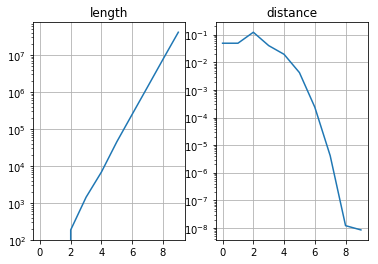

In [65]:
"""fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ln1=ax1.plot(x, length, c='C0')
ln2=ax2.plot(x, errors, c='C1')

ax1.set_xlabel('iteration')
ax1.set_ylabel(r'length')
ax1.grid(True)
ax2.set_ylabel(r'distance')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right')

#ax1.yscale('log')
#ax2.yscale('log')
"""
plt.figure()
plt.subplot(1,2,1)
plt.plot(x, length)
plt.yscale('log')
plt.title('length')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x, distances)
plt.yscale('log')
plt.title('distance')
plt.grid(True)
